# **Preparacion** **Dataset**

## De los dataset propuestos por el docente, escogimos el relacionado con el cáncer de mama, el cual una vez descargado de la página web https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset, procedemos a descomprimir y cargar en el drive para facilitar su consulta y manipulación, a continuación con el siguiente código procederemos a dar acceso al Google Drive.

In [32]:
# Acceso a drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Importación de Librerías y Cargue Dataset
## Posterior a tener acceso al Drive donde está almacenado el dataset, se accede a la ubicación del dataset, que para este caso es un archivo con extensión .csv y lo cargamos a la variable ds. También importamos la librería de pandas para la manipulación de los datos.  

In [33]:
import pandas as pd

# ID del archivo compartido
file_id = '1G35nDPlD60lTlzwJCpdhcfZ9G6ElYFHA'  # Reemplaza con el ID real del archivo

# URL de descarga
dataset_url = f'https://drive.google.com/uc?id={file_id}'

# Cargar el dataset
ds = pd.read_csv(dataset_url)

# Verificación de Cargue Dataset
## Con la siguiente línea de código, verificamos el cargue correcto de los datos del dataset

In [34]:
# informacion primeras filas
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploración inicial de datos
## Se realiza la descripcion de las columnas y los tipos de datos que que contiene cada una de ellas, en donde se observa que son en total 32 columnas y  569 filas. Como tipos de datos estan int64 para el id, object para columna diagnosis y float64 para las demás características del tumor.

## Las primeras columnas incluyen id, diagnosis, y características como radius_mean, texture_mean, perimeter_mean, entre otros. La columna diagnosis es del tipo object, indicando si el diagnóstico es maligno o benigno (M o B), mientras que el resto de las columnas representan características numéricas.

In [35]:
# Información sobre columnas y tipos de datos
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Estadísticas descriptivas básicas
## Utilizando la siguiente línea de código, ejecuta estadísticas básicas que incluyen conteo, promedio (mean), desviación estándar (std), valores mínimo y máximo, así mismo los cuartiles para cada columna numérica. Esto proporciona una visión general de la distribución de cada característica.

In [36]:
# Estadisticas basicas del dataset
ds.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Transformaciones necesarias para limpiar y preparar los datos
## Se utiliza la función `isnull()` para verificar si hay valores faltantes en el dataset, en donde los resultados nos indican que no hay valores nulos o faltantes.

In [37]:
# Verificacion de datos faltantes o nulos
ds.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


## Se realiza la eliminación de la columna "id", el cual por ser un identificador no proporciona información relevante para el análisis, por lo que se procederá a eliminarla.

In [39]:
# Eliminar la columna
ds_cleaned = ds.drop(columns=['id'])

## Transformación de los valores de la columna “diagnosis”, con el fin de convertir estos valores en datos numéricos, tomando 0 para benigno y 1 para maligno, con el fin de facilitar el análisis.

In [40]:
# Cambio de valores columna
ds_cleaned['diagnosis'] = ds_cleaned['diagnosis'].map({'M': 1, 'B': 0})

## Por último, vamos a realizar una normalización de los datos para las características numéricas, con el fin de que estén en una escala similar.

In [41]:
# importacion libreria
# datos a escala similar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = ds_cleaned.columns.drop('diagnosis')
ds_cleaned[numeric_columns] = scaler.fit_transform(ds_cleaned[numeric_columns])

# Dataset normalizado y limpio
## Finalmente se verifica las correcciones realizadas al dataset, con el fin de corroborar aquellas modificaciones realizadas para su mejor analisis

In [42]:
# verificacion cambios realizados
ds_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Correlación entre Variables
## A continuacion usaremos la función corr para explorar la correlación que existe entre las variables que contiene el dataset. Esto nos dará una matriz que muestra la correlación entre cada par de variables.

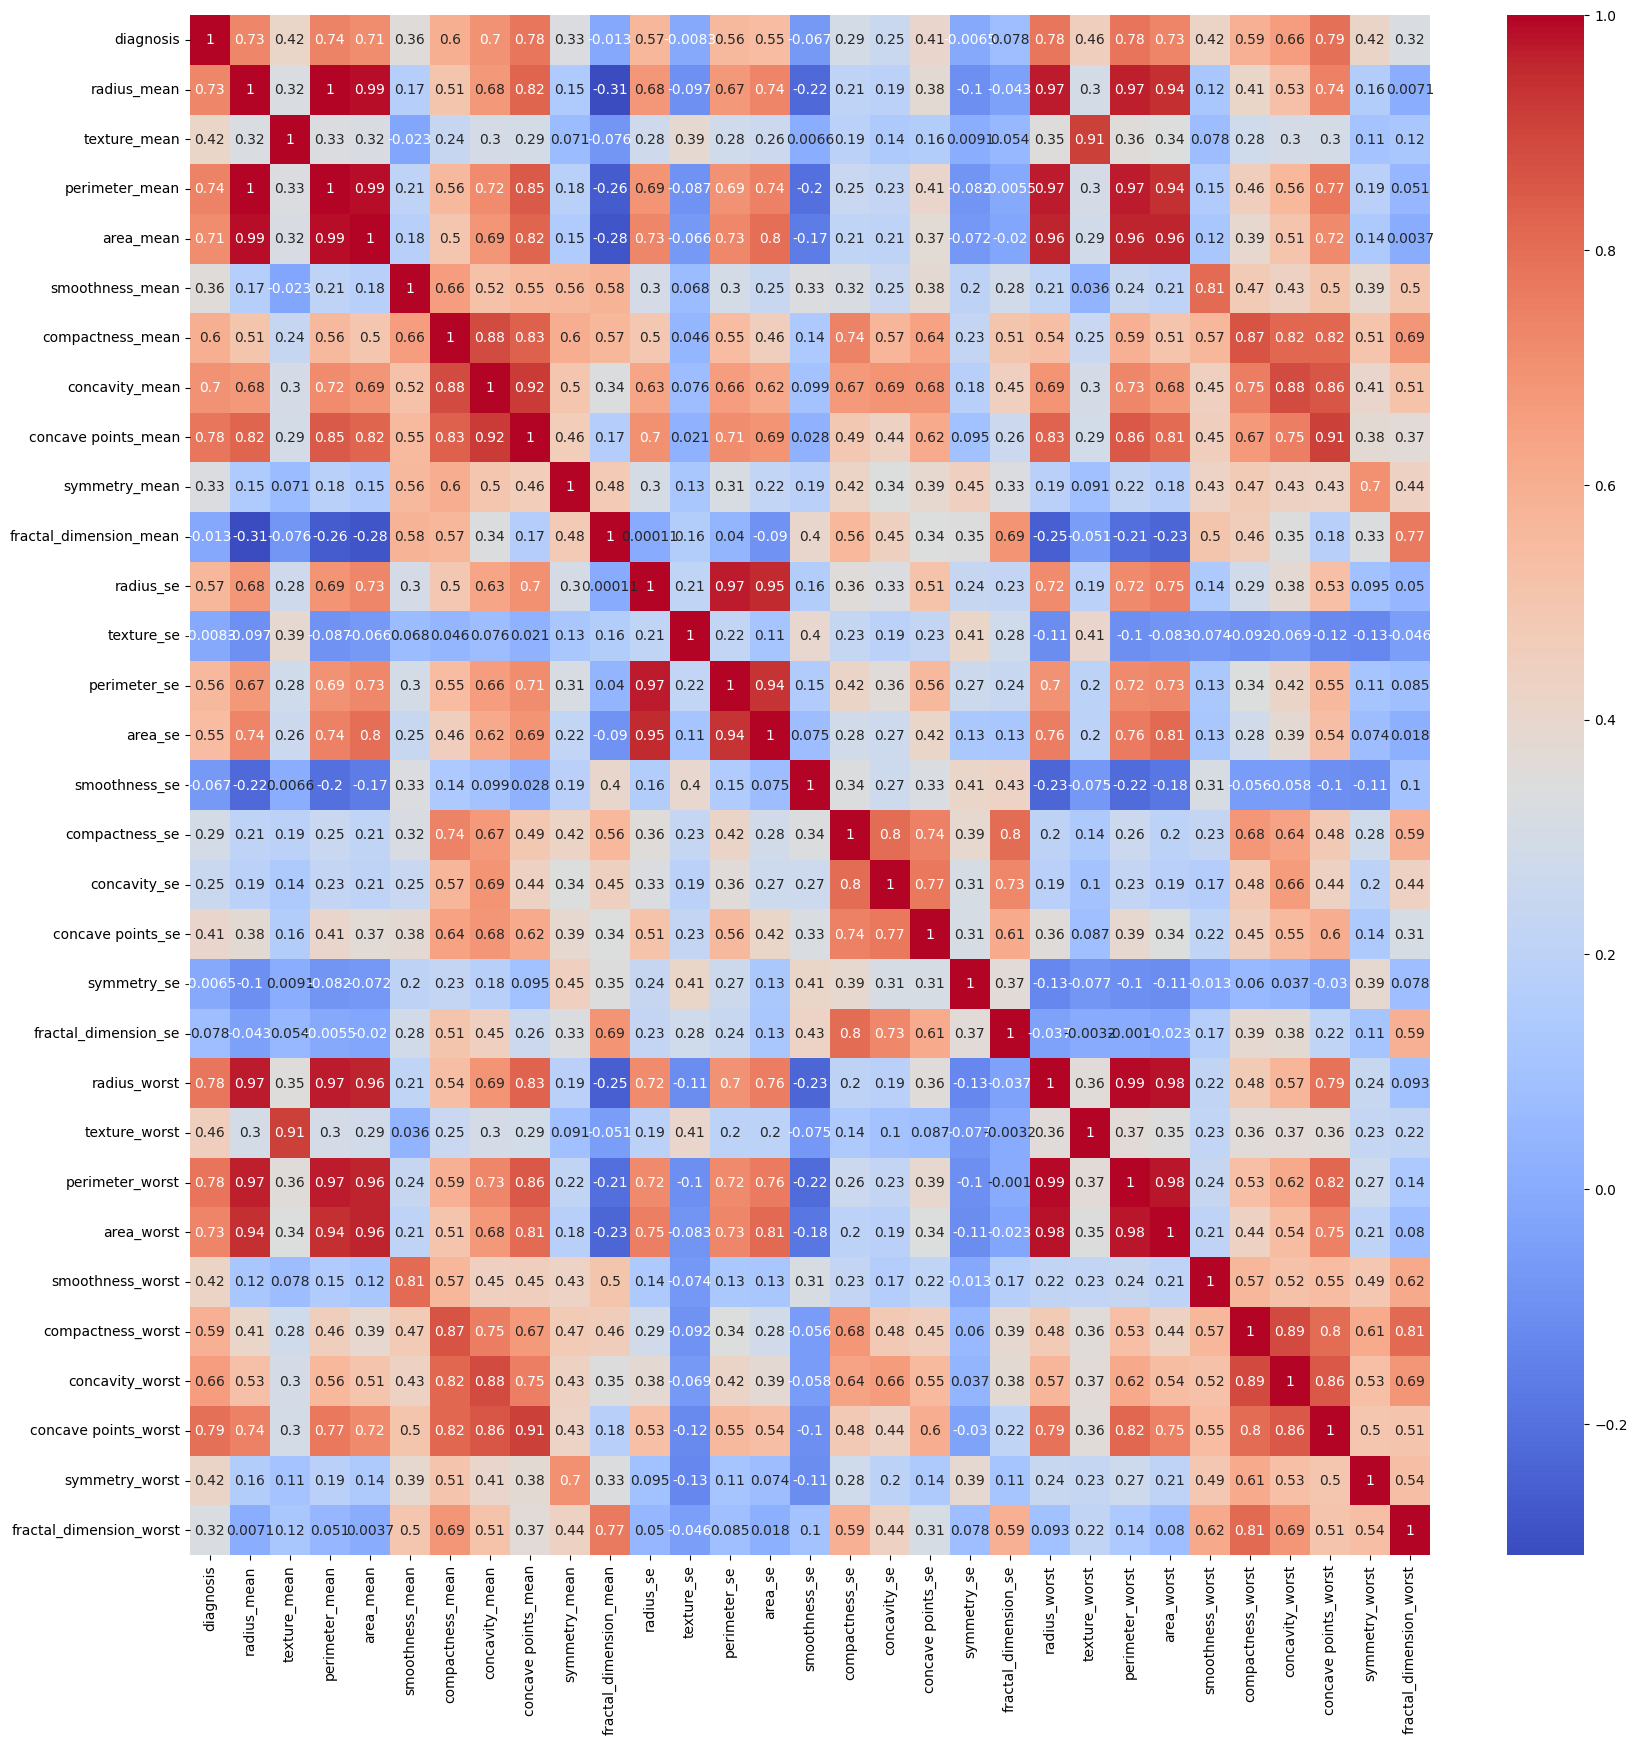

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Importacion de librerias necesarias
# aplicacion de funcion para correlacion

correlation_matrix = ds_cleaned.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Distribución de Variables
## A continuación exploraremos la distribución de las variables de las columnas, lo que nos arroja un histograma para cada columna numérica en el Dataset, lo cual nos permite analizar qué tipo de variable objetivo, distribución tiene cada columna, variables correlacionadas, no correlacionadas, continuas, discretas o categóricas



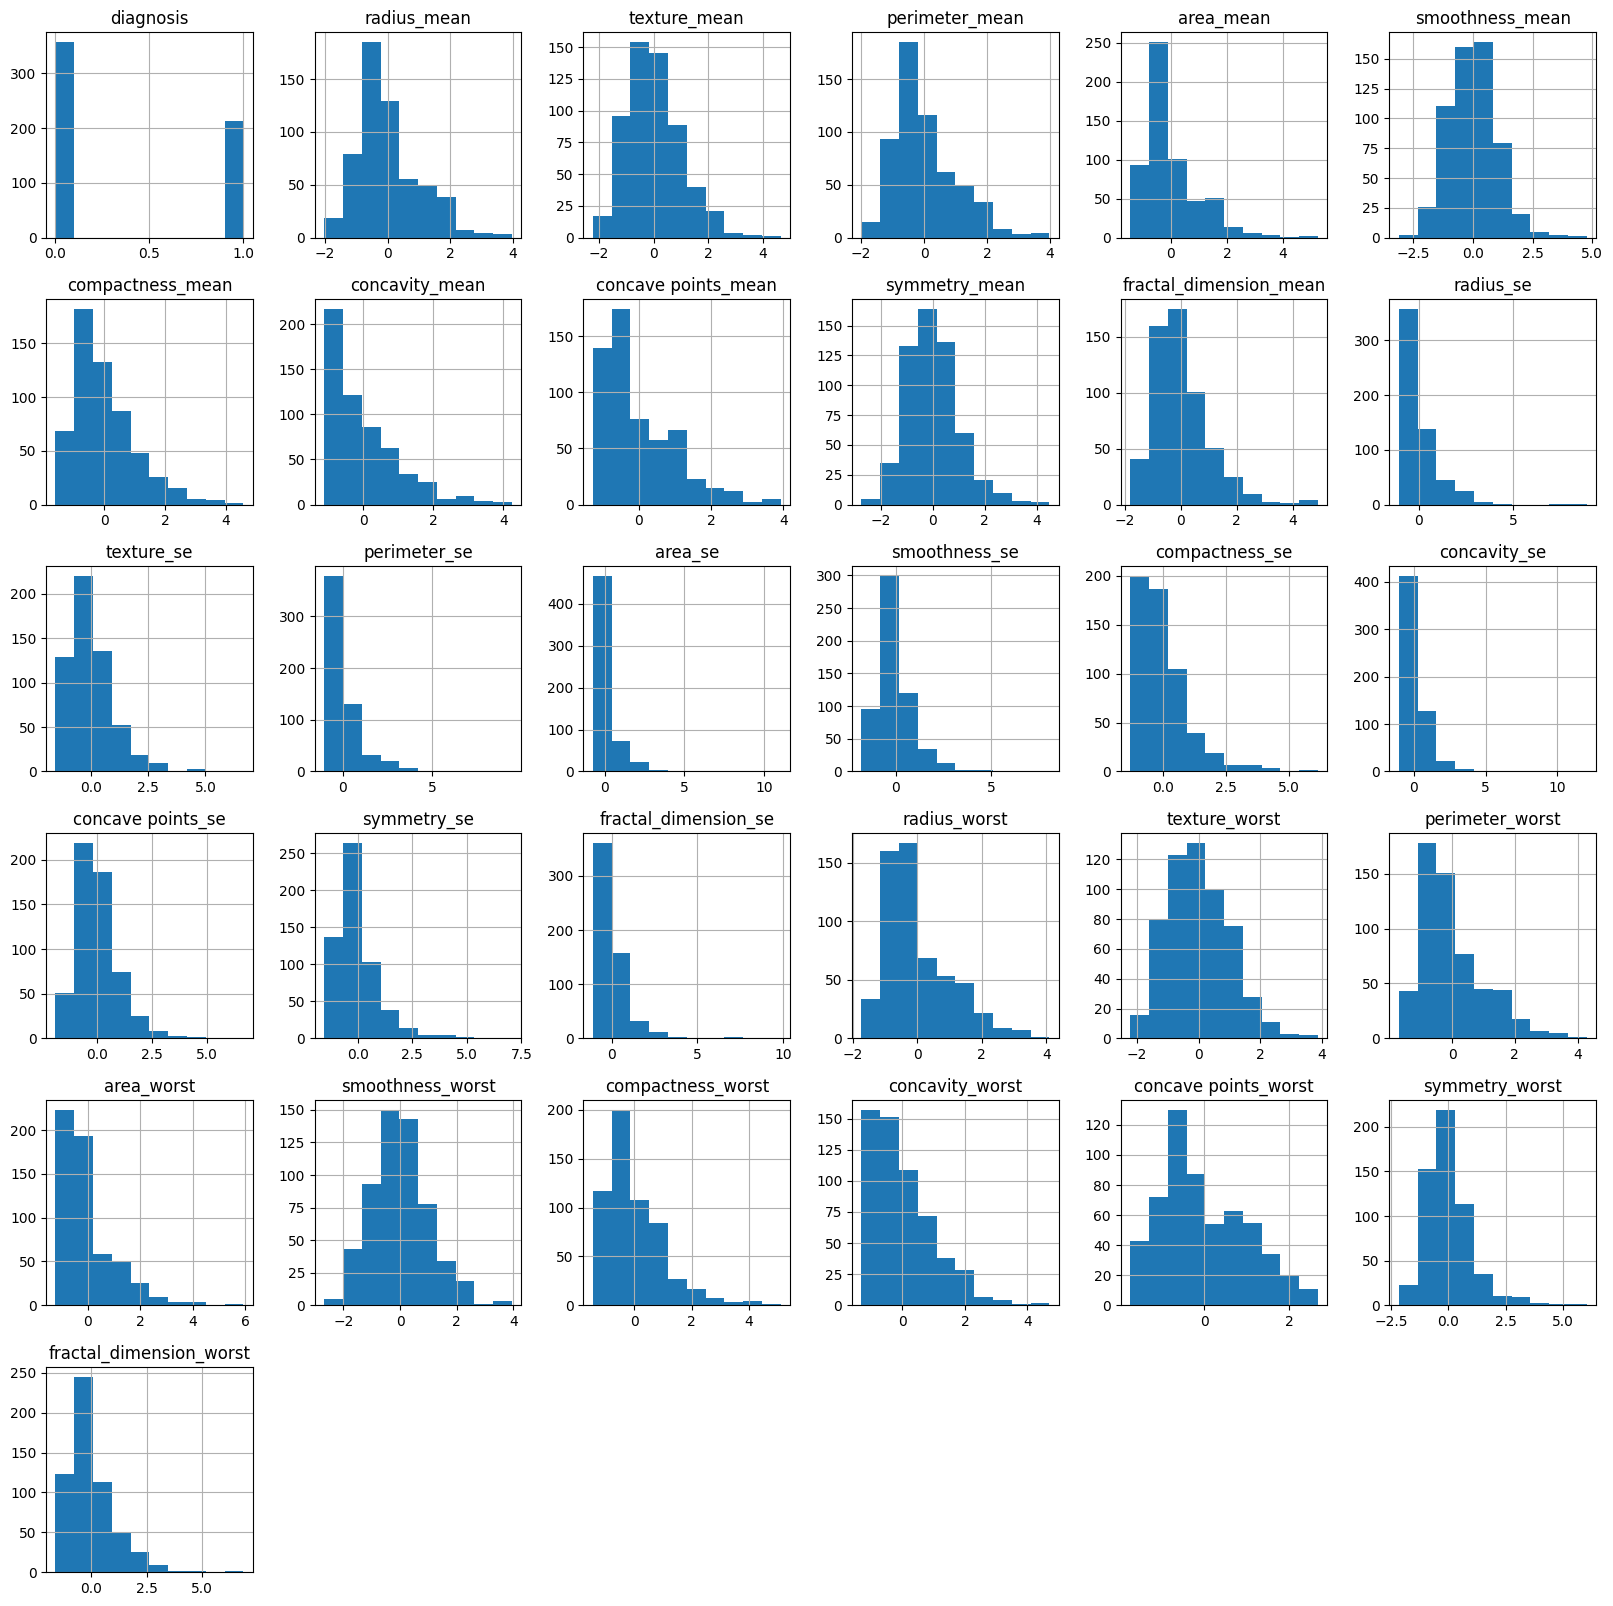

In [44]:
#
ds_cleaned.hist(figsize=(20, 20))
plt.show()